In [1]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter

# PARTE 1: Regresión Logística

# -Generación de datos
Separamos los datos leidos del csv para una mejor comprensión a lo largo de la práctica

In [2]:
def carga_csv(file_name):
    valoresX = read_csv(file_name, header = None).values
    return valoresX.astype(float)

values = carga_csv("ex2data1.csv")

#Notas examenes
examenes = values[:, :-1]

#Notas de examenes con columna de 1s
XEx = np.hstack([np.ones([examenes.shape[0], 1]), examenes])

m = XEx.shape[0]
n = XEx.shape[1]

#Indices de aprobados y suspensos
indices = values[:, -1]

# -Visualización de los datos
Creamos una gráfica en la que los aprobados aparecen con una 'O' y los suspensos con una 'X'

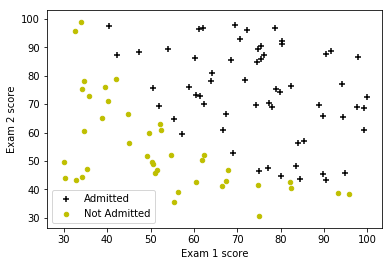

In [3]:
def pinta_grafica():
    plt.figure()
    indexPassed = np.where(indices == 1)
    plt.scatter(XEx[indexPassed, 1], XEx[indexPassed, 2], marker = '+', c = 'k')

    indexNotPassed = np.where(indices == 0)
    plt.scatter(XEx[indexNotPassed, 1], XEx[indexNotPassed, 2], s = 20 , marker = 'o', c = 'y')

    plt.legend(['Admitted', 'Not Admitted'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
pinta_grafica()

# -Función Sigmoide
Calculamos la sigmoide de un valor, matriz o vector

In [4]:
def sigmoide(value):
    s = 1/(1+np.exp(-value))
    return s

#vector
vector = sigmoide(np.array([1, 2, 3, 4, 5, 6]))
print("SIGMOIDE VECTOR: " + str(vector))

#número
numero = sigmoide(1)
print("SIGMOIDE NUMERO: " + str(numero))

#matrix
matrix = sigmoide(np.array([[1, 2], [3, 4], [5, 6]]))
print("SIGMOIDE MATRIZ: " + str(matrix))

SIGMOIDE VECTOR: [0.73105858 0.88079708 0.95257413 0.98201379 0.99330715 0.99752738]
SIGMOIDE NUMERO: 0.7310585786300049
SIGMOIDE MATRIZ: [[0.73105858 0.88079708]
 [0.95257413 0.98201379]
 [0.99330715 0.99752738]]


# -Cálculo de la función de coste y su gradiente

In [5]:
theta = np.zeros((1, n)) #1 fila, 2 columnas
#La función sigmoide es la función h, la hipótesis
def coste(O, X, Y):
    H = sigmoide(np.dot(X,O.T))
    logH = np.log(H)
    logAux = np.log((1- H))
    sumatorio = (-1/m)* (np.dot(Y, logH) + np.dot((1-Y), logAux))
    return sumatorio
    

def gradiente(O, X, Y):
    return (X.T.dot((sigmoide(X.dot(O.T))) - Y))/m


coste(theta, XEx, indices)
gradiente(theta, XEx, indices)

array([[  0.5       ,   0.5       ,   0.5       ,  -0.5       ,
         -0.5       ,   0.5       ,  -0.5       ,  -0.5       ,
         -0.5       ,  -0.5       ,   0.5       ,   0.5       ,
         -0.5       ,  -0.5       ,   0.5       ,  -0.5       ,
         -0.5       ,   0.5       ,  -0.5       ,  -0.5       ,
          0.5       ,  -0.5       ,   0.5       ,   0.5       ,
         -0.5       ,  -0.5       ,  -0.5       ,   0.5       ,
          0.5       ,   0.5       ,  -0.5       ,  -0.5       ,
          0.5       ,  -0.5       ,   0.5       ,   0.5       ,
          0.5       ,  -0.5       ,   0.5       ,   0.5       ,
         -0.5       ,   0.5       ,  -0.5       ,   0.5       ,
          0.5       ,   0.5       ,  -0.5       ,  -0.5       ,
         -0.5       ,  -0.5       ,  -0.5       ,  -0.5       ,
         -0.5       ,   0.5       ,   0.5       ,   0.5       ,
         -0.5       ,   0.5       ,  -0.5       ,  -0.5       ,
         -0.5       ,   0.5       ,   0.

# -Pintar frontera

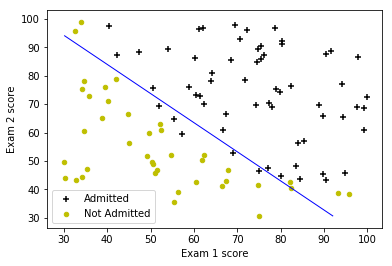

In [6]:
def pinta_frontera_recta(X, Y, theta):
    pinta_grafica()
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                           np.linspace(x2_min, x2_max))
    
    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)),
                     xx1.ravel(),
                     xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    
    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

result = opt.fmin_tnc(func = coste, x0 = theta, fprime=gradiente, args=(XEx, indices))
theta_opt = result[0]
pinta_frontera_recta(XEx, indices, theta_opt)

# -Evaluación de la regresión logística
Implementación de una función que nos calcula el porcentaje de ejemplos que son correctos a partir del theta óptimo que hemos conseguido en el apartado anterior

In [8]:
def evalua(O, X):
    res = sigmoide(X.dot(O))
    passed = len(np.where(res >= 0.5))
    failed = len(np.where(res < 0.5))
    total = passed + failed
    return passed / total
porcentaje = evalua(theta_opt, XEx)
print("Porcentaje de aprobados: " + str(porcentaje*100) + "%")

Porcentaje de aprobados: 50.0%


# PARTE 2: Regresión Logística Regularizada

# -Visualizar datos

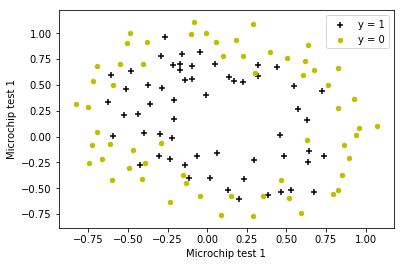

In [9]:
values2 = carga_csv("ex2data2.csv")
valuesChips = values2[:, :-1]
flags = values2[:, -1]

def pinta_grafica2():
    plt.figure()
    indexPassed = np.where(flags == 1)
    plt.scatter(valuesChips[indexPassed, 0], valuesChips[indexPassed, 1], marker = '+', c = 'k')

    indexNotPassed = np.where(flags == 0)
    plt.scatter(valuesChips[indexNotPassed, 0], valuesChips[indexNotPassed, 1], s = 20 , marker = 'o', c = 'y')

    plt.legend(['y = 1', 'y = 0'])
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 1')
    
pinta_grafica2()

# -Mapeo de los atributos

In [31]:
m = valuesChips.shape[0]
poly = PolynomialFeatures(6)
XFitted = poly.fit_transform(valuesChips)
n = XFitted.shape[1]

theta2 = np.zeros((1, n)) #1 fila, 2 columnas
lam = 1 #lambda

# -Calculo de la función de coste y su gradiente

In [51]:
   #FUNCIÓN DE COSTE
def coste2(O, X, Y, lam):
    cos = coste(O, X, Y) + (lam/2*m)*(theta**2)
    return cos

print("Coste: " + str(coste2(theta, XFitted, flags, lam)[0, 0]))

def gradiente2(O, X, Y, lam):
    #newO = np.delete(O, O[0], 1)
    initial_theta = np.hstack([np.zeros(), O[1:,]])
    grad = (X.T.dot((sigmoide(X.dot(O.T))) - Y))/m
    sol = grad + (lam/m)*initial_theta
    return grad
gradiente2(theta2, XFitted, flags, lam)

Coste: 0.6931471805599453


ValueError: all the input arrays must have same number of dimensions

# Cálculo del valor óptimo

In [41]:
result2 = opt.fmin_tnc(func = coste2, x0 = theta2, fprime=gradiente2, args=(XFitted, flags, lam))
#theta_opt2 = result2[0]

ValueError: tnc: invalid return value from minimized function.